**Global Solutions - Grupo BlueGather:**
- RM: 97068 - Gustavo Sorrilha Sanches
- RM: 96466 - Kaue Caponero Figueiredo
- RM: 97503 - Mariana Santos Fernandes de Souza
- RM: 97324 - Natan Cruz
- RM: 97092 - Vitor Rubim Passos

**Desafio 02:**

**Desenvolver modelos preditivos usando técnicas de Machine Learning para prever condições ambientais marítimas.**

O desenvolvimento envolve as etapas de exploração de dados, levantamento de hipótese, criação e treinamento de modelo com validações e conclusão. Tenha em mente como ajudar a antecipar eventos prejudiciais para a vida marinha.

In [ ]:
# Importando Bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Importar o arquivo 'kaggle.json' nos ficheiros do Collab para acesso a API
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kauecaponero","key":"f3171fdfa548971bcbf8cd0bc263f286"}'}

In [ ]:
# Configuração do Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download do conjunto de dados do Kaggle
!kaggle datasets download -d sohier/calcofi
!unzip calcofi.zip -d calcofi_data

Dataset URL: https://www.kaggle.com/datasets/sohier/calcofi
License(s): other
 99% 50.0M/50.4M [00:02<00:00, 29.0MB/s]
100% 50.4M/50.4M [00:02<00:00, 22.7MB/s]
Archive:  calcofi.zip
  inflating: calcofi_data/bottle.csv  
  inflating: calcofi_data/cast.csv   


In [ ]:
# Carregamento do Conjunto de Dados
data = pd.read_csv('calcofi_data/bottle.csv')

<ipython-input-2-80de29a2d5e1>:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('calcofi_data/bottle.csv')


In [ ]:
# Ver a quantidade de dados (linhas e colunas)
print(f'O DataFrame contém {data.shape[0]} linhas e {data.shape[1]} colunas.')

O DataFrame contém 864863 linhas e 74 colunas.


In [ ]:
# Verificar se há valores ausentes
print('Valores ausentes por coluna:')
print(data.isnull().sum())

Valores ausentes por coluna:
Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64


In [ ]:
# Informações gerais do DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [ ]:
# Exibindo as primeiras linhas do conjunto de dados
print(data.head())

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAEO  R_PRES  \
0       0   10.50  33.440     NaN  25.649    NaN  ...      NaN       0   
1       8   10.46  33.440     NaN  25.656    NaN  ...      NaN       8   
2      10   10.46  33.437     NaN  25.654    NaN  ...      NaN      10   
3      19   10.45  33.420     NaN  25.643    NaN  ...      NaN      19   
4      20   10.45  33.421     NaN  25.643    NaN  ...      NaN      20   

   R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  DIC Quality Comment  
0     NaN   NaN   NaN  NaN  NaN  

In [ ]:
# Descrição estatística do conjunto de dados
print(data.describe())

             Cst_Cnt        Btl_Cnt         Depthm         T_degC  \
count  864863.000000  864863.000000  864863.000000  853900.000000   
mean    17138.790958  432432.000000     226.831951      10.799677   
std     10240.949817  249664.587269     316.050259       4.243825   
min         1.000000       1.000000       0.000000       1.440000   
25%      8269.000000  216216.500000      46.000000       7.680000   
50%     16848.000000  432432.000000     125.000000      10.060000   
75%     26557.000000  648647.500000     300.000000      13.880000   
max     34404.000000  864863.000000    5351.000000      31.140000   

              Salnty         O2ml_L         STheta          O2Sat  \
count  817509.000000  696201.000000  812174.000000  661274.000000   
mean       33.840350       3.392468      25.819394      57.103779   
std         0.461843       2.073256       1.167787      37.094137   
min        28.431000      -0.010000      20.934000      -0.100000   
25%        33.488000       1.3600

In [ ]:
# Selecionando variáveis relevantes para a predição, priorizando colunas com menos valores ausentes
selected_columns = ['Salnty', 'T_degC', 'O2ml_L', 'O2Sat', 'ChlorA', 'Phaeop', 'PO4uM', 'SiO3uM', 'NO2uM', 'NO3uM', 'T_degC']
data_selected = data[selected_columns]

In [ ]:
# Preenchendo valores ausentes com a mediana das colunas
data_filled = data_selected.fillna(data_selected.median())

In [ ]:
# Ver a quantidade de dados após a limpeza (linhas e colunas)
print(f'O DataFrame limpo contém {data_filled.shape[0]} linhas e {data_filled.shape[1]} colunas.')

O DataFrame limpo contém 864863 linhas e 11 colunas.


In [ ]:
# Separando as variáveis independentes (X) e dependente (y)
X = data_filled.drop(columns='T_degC')
y = data_filled['T_degC']

In [ ]:
# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Treinando um modelo de RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

In [ ]:
# Calculando o erro quadrático médio (MSE) e o R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2.104389261860513
R^2 Score: 0.8814185493713754


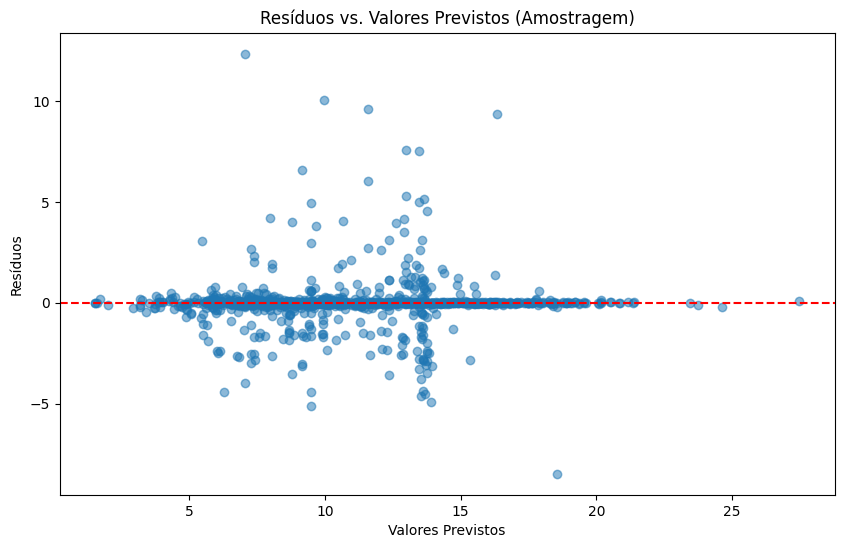

In [ ]:
# Visualização dos resíduos com amostragem
residuos = y_test.values - y_pred  # Convertendo y_test para numpy array
sampled_indices = np.random.choice(len(residuos), size=min(1000, len(residuos)), replace=False)  # Amostragem de até 1000 pontos
sampled_residuos = residuos[sampled_indices]
sampled_y_pred = y_pred[sampled_indices]

plt.figure(figsize=(10, 6))
plt.scatter(sampled_y_pred, sampled_residuos, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos (Amostragem)')
plt.show()

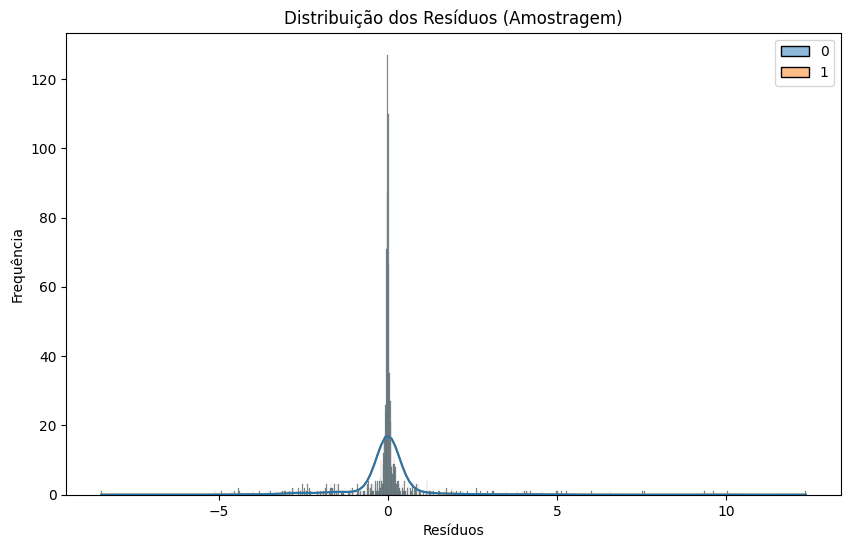

In [ ]:
# Histograma dos resíduos com amostragem
plt.figure(figsize=(10, 6))
sns.histplot(sampled_residuos, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos (Amostragem)')
plt.show()

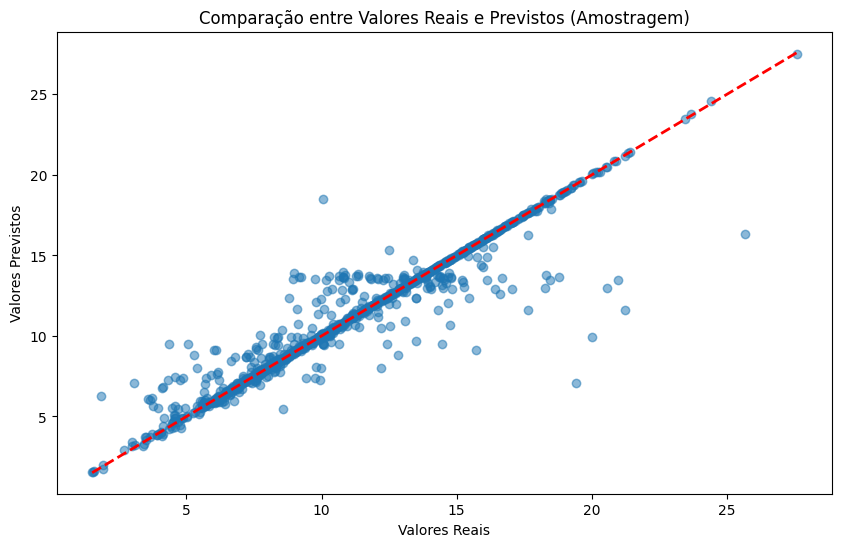

In [ ]:
# Comparação entre os valores reais e previstos com amostragem
sampled_y_test = y_test.values[sampled_indices]

plt.figure(figsize=(10, 6))
plt.scatter(sampled_y_test, sampled_y_pred, alpha=0.3)
plt.plot([sampled_y_test.min(), sampled_y_test.max()], [sampled_y_test.min(), sampled_y_test.max()], 'r--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos (Amostragem)')
plt.show()